# MARKOV

https://towardsdatascience.com/hands-on-markov-chains-example-using-python-8138bf2bd971

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Matriz de Transição
https://towardsdatascience.com/hands-on-markov-chains-example-using-python-8138bf2bd971

In [2]:
# plt.style.use('ggplot')
# plt.rcParams['font.family'] = 'sans-serif' 
# plt.rcParams['font.serif'] = 'Ubuntu' 
# plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
# plt.rcParams['font.size'] = 14 
# plt.rcParams['axes.labelsize'] = 12 
# plt.rcParams['axes.labelweight'] = 'bold' 
# plt.rcParams['axes.titlesize'] = 12 
# plt.rcParams['xtick.labelsize'] = 12 
# plt.rcParams['ytick.labelsize'] = 12 
# plt.rcParams['legend.fontsize'] = 12 
# plt.rcParams['figure.titlesize'] = 12 
# plt.rcParams['image.cmap'] = 'jet' 
# plt.rcParams['image.interpolation'] = 'none' 
# plt.rcParams['figure.figsize'] = (12, 10) 
# plt.rcParams['axes.grid']=False
# plt.rcParams['lines.linewidth'] = 2 
# plt.rcParams['lines.markersize'] = 8
# colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
# 'xkcd:scarlet']

In [3]:
start = 0
x = []
n = 10000
for i in range(n):
    step = np.random.choice([-1,1],p=[0.5,0.5])
    start = start + step
    x.append(start)

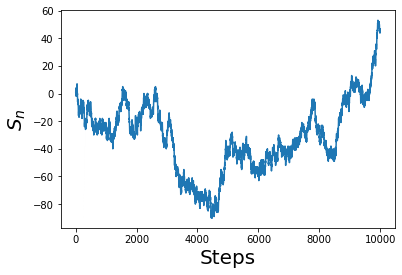

In [4]:
plt.plot(x)
plt.xlabel('Steps',fontsize=20)
plt.ylabel(r'$S_{n}$',fontsize=20);

In [5]:
x = []
p = [[0.5,0.5],[0.9,0.1],[0.8,0.2],[0.6,0.4],[0.4,0.6],[0.2,0.8],[0.1,0.9]]
label_p = ['Simple',r'$p=0.9$',r'$p=0.8$',r'$p=0.6$',r'$p=0.4$',r'$p=0.2$',r'$p=0.1$']
n = 10000
for couple in p:
    x_p = []
    start = 0
    for i in range(n):
        step = np.random.choice([-1,1],p=couple)
        start = start + step
        x_p.append(start)
    x.append(x_p)

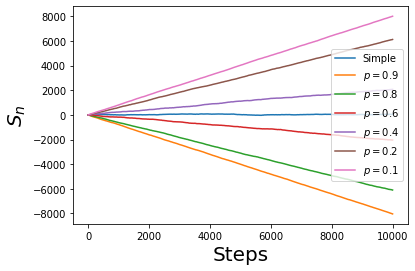

In [6]:
i=0
for time_series in x:
    plt.plot(time_series, label = label_p[i])
    i=i+1
plt.xlabel('Steps',fontsize=20)
plt.ylabel(r'$S_{n}$',fontsize=20)
plt.legend();

In [7]:
def gamblersruinchain(start, first, last, n):
    for k in range(n):
        step = np.random.choice([-1,1], p=[0.5,0.5])
        
#         print(f'k:{k} | start: {start} | first:{first} | last:{last} | step: {step}')
        if start==first or start==last:
            start = start
        else:
            
            start = start + step
    return start

In [8]:
state_list = []
size = 100000 #100000
for i in range(size):
    state_list.append(gamblersruinchain(3, 0, 5, 2))
    
len(state_list)

100000

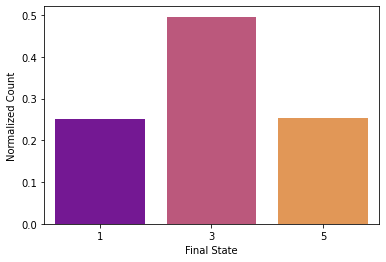

In [9]:
data_state = pd.DataFrame({'Final State':state_list})
data_occ = pd.DataFrame(data_state.value_counts('Final State')).rename(columns={0:'Count'})
data_occ['Count'] = data_occ['Count']/size
sns.barplot(x=data_occ.index,y=data_occ['Count'],palette='plasma')
plt.ylabel('Normalized Count');

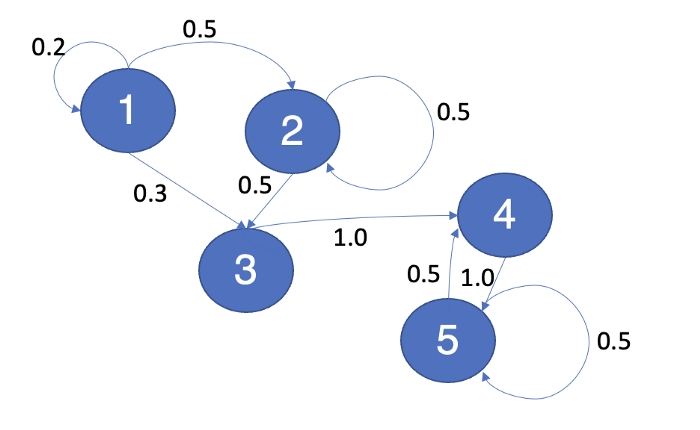

In [10]:
state_1 = [0.2,0.5,0.3,0,0]
state_2 = [0,0.5,0.5,0,0]
state_3 = [0,0,1,0,0]
state_4 = [0,0,0,0,1]
state_5 = [0,0,0,0.5,0.5]
trans_matrix = [state_1,state_2,state_3,state_4,state_5]
trans_matrix = np.array(trans_matrix)
trans_matrix

array([[0.2, 0.5, 0.3, 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0.5, 0.5]])

In [11]:
def t(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = 0.5**s
        y.append(v)
    return y

Text(0.5, 0, '$N-1$')

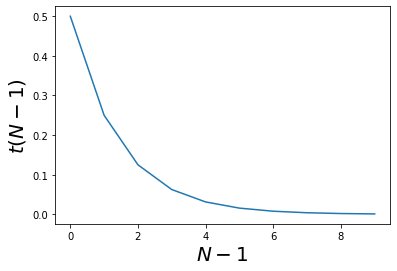

In [12]:
plt.plot(t(10))
plt.ylabel(r'$t(N-1)$',fontsize=20)
plt.xlabel(r'$N-1$',fontsize=20)

In [13]:
def prob(N):
    states = np.arange(1,6,1)
    steps = np.arange(1,N+1,1)
    n=1000
    state_collection = []
    for k in range(n):
        start = 2 
        for i in range(N):
            start = np.random.choice(states,p=trans_matrix[start-1])
        if start==2:
            state_collection.append(1)
        else:
            state_collection.append(0)
    state_collection = np.array(state_collection)
    return state_collection.sum()/n

In [14]:
def p(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = prob(s)
        y.append(v)
    return y

In [16]:
p_20 = p(20)

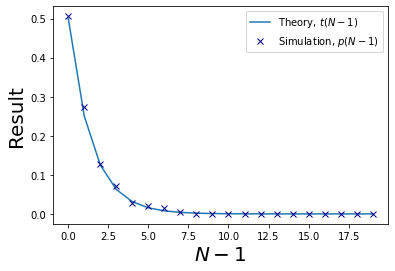

In [17]:

plt.plot(t(20),label=r'Theory, $t(N-1)$')
plt.plot(p_20,'x',label=r'Simulation, $p(N-1)$',color='navy')
plt.ylabel(r'Result',fontsize=20)
plt.xlabel(r'$N-1$',fontsize=20)
plt.legend();